In [159]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import timedelta
from sklearn.linear_model import LinearRegression
import math
from sklearn.ensemble import HistGradientBoostingRegressor

In [160]:
df = pd.read_excel("/content/data.xlsx")

In [161]:
df.head(5)

,Unnamed: 0,Server_Name,STANDARD_TIMESTAMP,Disk_Name,Total_Size,Free_Megabytes,%_Used,%_Free
0,1035464,bry_wbddsmp:NT,2021/02/01 00:00,C:,204297,125482,39,61
1,1035465,bry_wbddsmp:NT,2021/02/01 00:00,D:,650000,613795,6,94
2,1035466,bry_wbddsmp:NT,2021/02/01 00:00,E:,650000,629608,4,96
3,1035467,bry_wbddsmp:NT,2021/02/01 00:00,F:,100000,96328,4,96
4,1035468,bry_wbddsmp:NT,2021/02/01 00:00,I:,504637,504429,1,99


In [162]:
df.shape

(10926, 8)

In [163]:
df.describe()

,Unnamed: 0,Total_Size,Free_Megabytes,%_Used,%_Free
count,1.092600e+04,10926.000000,10926.000000,10926.000000,10926.000000
mean,1.042019e+06,421766.894289,389320.499725,11.410763,88.589237
std,3.785051e+03,228865.414230,231464.523949,14.121190,14.121190
min,1.035464e+06,100000.000000,96328.000000,1.000000,60.000000
25%,1.038741e+06,204297.000000,125470.000000,3.000000,87.000000
50%,1.042018e+06,504637.000000,504429.000000,4.000000,96.000000
75%,1.045296e+06,650000.000000,613807.000000,13.000000,97.000000
max,1.048574e+06,650000.000000,629609.000000,40.000000,99.000000


In [164]:
df.columns

Index(['Unnamed: 0', 'Server_Name', 'STANDARD_TIMESTAMP', 'Disk_Name',
       'Total_Size', 'Free_Megabytes', '%_Used', '%_Free'],
      dtype='object')

In [165]:
df['Disk_Name'].unique()

array(['C:', 'D:', 'E:', 'F:', 'I:'], dtype=object)

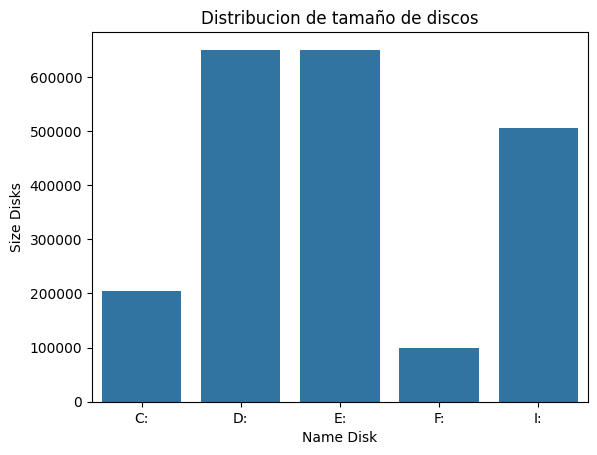

In [166]:
sns.barplot(x = df['Disk_Name'], y = df['Total_Size'])
plt.xlabel('Name Disk')
plt.ylabel('Size Disks')
plt.title('Distribucion de tamaño de discos')
plt.show()

In [167]:
df_copy = df.copy()

In [168]:
df_copy

,Unnamed: 0,Server_Name,STANDARD_TIMESTAMP,Disk_Name,Total_Size,Free_Megabytes,%_Used,%_Free
0,1035464,bry_wbddsmp:NT,2021/02/01 00:00,C:,204297,125482,39,61
1,1035465,bry_wbddsmp:NT,2021/02/01 00:00,D:,650000,613795,6,94
2,1035466,bry_wbddsmp:NT,2021/02/01 00:00,E:,650000,629608,4,96
3,1035467,bry_wbddsmp:NT,2021/02/01 00:00,F:,100000,96328,4,96
4,1035468,bry_wbddsmp:NT,2021/02/01 00:00,I:,504637,504429,1,99
...,...,...,...,...,...,...,...,...
10921,1048569,bry_wbddsmp:NT,2021/03/18 12:00,D:,650000,613784,6,94
10922,1048570,bry_wbddsmp:NT,2021/03/18 12:00,E:,650000,629608,4,96
10923,1048571,bry_wbddsmp:NT,2021/03/18 12:00,F:,100000,97480,3,97
10924,1048572,bry_wbddsmp:NT,2021/03/18 12:00,I:,504637,504429,1,99


In [169]:
df.head()

,Unnamed: 0,Server_Name,STANDARD_TIMESTAMP,Disk_Name,Total_Size,Free_Megabytes,%_Used,%_Free
0,1035464,bry_wbddsmp:NT,2021/02/01 00:00,C:,204297,125482,39,61
1,1035465,bry_wbddsmp:NT,2021/02/01 00:00,D:,650000,613795,6,94
2,1035466,bry_wbddsmp:NT,2021/02/01 00:00,E:,650000,629608,4,96
3,1035467,bry_wbddsmp:NT,2021/02/01 00:00,F:,100000,96328,4,96
4,1035468,bry_wbddsmp:NT,2021/02/01 00:00,I:,504637,504429,1,99


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10926 entries, 0 to 10925
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          10926 non-null  int64 
 1   Server_Name         10926 non-null  object
 2   STANDARD_TIMESTAMP  10926 non-null  object
 3   Disk_Name           10926 non-null  object
 4   Total_Size          10926 non-null  int64 
 5   Free_Megabytes      10926 non-null  int64 
 6   %_Used              10926 non-null  int64 
 7   %_Free              10926 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 683.0+ KB


In [172]:
df_copy['STANDARD_TIMESTAMP'] = pd.to_datetime(df_copy['STANDARD_TIMESTAMP'], errors='coerce')
print(f"Fechas válidas: {df_copy['STANDARD_TIMESTAMP'].notna().sum()} de {len(df)}")

Fechas válidas: 10926 de 10926


In [173]:
print(df_copy.columns.tolist())

['Unnamed: 0', 'Server_Name', 'STANDARD_TIMESTAMP', 'Disk_Name', 'Total_Size', 'Free_Megabytes', '%_Used', '%_Free']


In [174]:
df_copy.head()

,Unnamed: 0,Server_Name,STANDARD_TIMESTAMP,Disk_Name,Total_Size,Free_Megabytes,%_Used,%_Free
0,1035464,bry_wbddsmp:NT,2021-02-01,C:,204297,125482,39,61
1,1035465,bry_wbddsmp:NT,2021-02-01,D:,650000,613795,6,94
2,1035466,bry_wbddsmp:NT,2021-02-01,E:,650000,629608,4,96
3,1035467,bry_wbddsmp:NT,2021-02-01,F:,100000,96328,4,96
4,1035468,bry_wbddsmp:NT,2021-02-01,I:,504637,504429,1,99


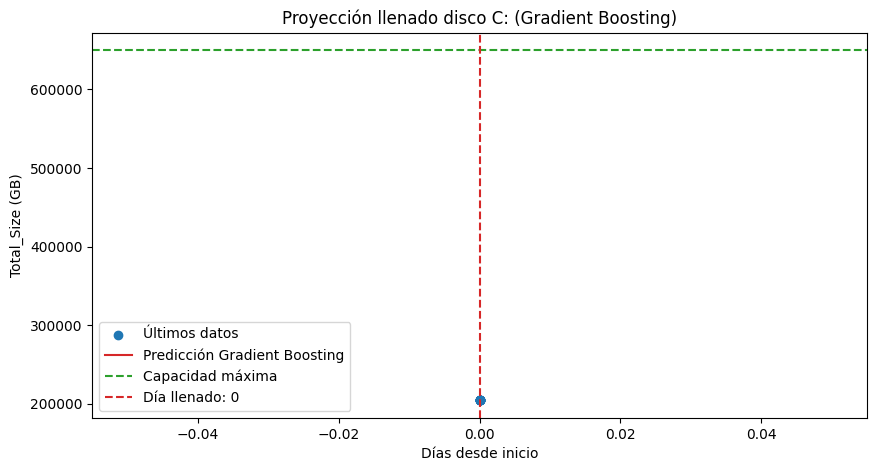

In [176]:
nombre_disco = "C:"
capacidad_maxima = 650000


df = df_copy[df_copy['Disk_Name'] == nombre_disco].copy()
df['STANDARD_TIMESTAMP'] = pd.to_datetime(df['STANDARD_TIMESTAMP'], format='%Y/%m/%d', errors='coerce')
df.dropna(subset=['STANDARD_TIMESTAMP', 'Total_Size'], inplace=True)
df.sort_values('STANDARD_TIMESTAMP', inplace=True)

df5 = df.tail(10).copy()
fecha_inicio = df5['STANDARD_TIMESTAMP'].min()
df5['Days'] = (df5['STANDARD_TIMESTAMP'] - fecha_inicio).dt.days

X = df5[['Days']]
y = df5['Total_Size']

model = HistGradientBoostingRegressor()
model.fit(X, y)

pendiente_estim = (model.predict([[1]]) - model.predict([[0]]))[0]
intercepto_estim = model.predict([[0]])[0]

dias_lleno = (capacidad_maxima - intercepto_estim) / pendiente_estim
dias_lleno = dias_lleno if math.isfinite(dias_lleno) and dias_lleno > 0 else 0
dias_lleno = int(dias_lleno)

fecha_lleno = fecha_inicio + timedelta(days=dias_lleno)


plt.figure(figsize=(10,5))
plt.scatter(df5['Days'], df5['Total_Size'], label='Últimos datos')
plt.plot(df5['Days'], model.predict(X), color='tab:red', label='Predicción Gradient Boosting')
plt.axhline(y=capacidad_maxima, color='tab:green', linestyle='--', label='Capacidad máxima')
plt.axvline(x=dias_lleno, color='tab:red', linestyle='--', label=f'Día llenado: {dias_lleno}')
plt.xlabel("Días desde inicio")
plt.ylabel("Total_Size (GB)")
plt.title(f"Proyección llenado disco {nombre_disco} (Gradient Boosting)")
plt.legend()
plt.show()